# Helstrom Measurement with 5 particles

In this notebook we're going to compute $P_s$ (the probability of success) using Helstrom stragegy and compare it with other already analized as the simple one or the $P_{BL}$ 

## Naming convention

Let's put some order here!

- **States** of the particles. Sometimes we call it $\Psi_1$ / $\Psi_2$ or $|0>$ / $|\Phi>$ ... We are going to call them state $0$ and state $1$.
- **Result**, output ... This is what we get when a measurement is performed using the operators $E_i$. Sometimes we calle it $\Pi_0$, $E_0$ ... We are going to call it result $0$ and result $1$, hoping that the context proivide the info required when to know when we re talking about *states* or *results*.
- **Hypothesis** ($H_i$), experiments ... each of them consist in a serie of particles that can start but state $0$ at an a certain moment change permament to state $1$. We have the following possibilities with 5 particles:
  - 0, 0, 0, 0, 1
  - 0, 0, 0, 1, 1
  - 0, 0, 1, 1, 1
  - 0, 1, 1, 1, 1
  - 1, 1, 1, 1, 1

## No online stratery : in Helstrom we can not distinguish states

The main difference between Helstrom and the basic strategy is that when get a result $1$ we have too keep measuring becuase this can be "produced" by the status $0$ and status $1$. In the basic strategy where we could "stop measuring" because the result result $1$ can **only be caused** by state state $1$. 

That means that for Helstrom we have to consider all the oputputs (32) and for each of them compute which is the hypothesis with the higher probability.



## Info we have  so far


We have already computed $\rho_0$ and $\rho_1$ in the computational basis:
$$ 
\rho_0 = 
\begin{pmatrix}
cos^2(\theta) & cos(\theta)sin(\theta)\\
cos(\theta)sin(\theta) & sin^2(\theta)
\end{pmatrix}
$$

$$ 
\rho_1 = 
\begin{pmatrix}
cos^2(\theta) & -cos(\theta)sin(\theta)\\
-cos(\theta)sin(\theta) & sin^2(\theta)
\end{pmatrix}
$$ 

And the same with $E_0$ and $E_1$ in the computational basis:
$$
E_0 = 
\frac{1}{2}
\begin{pmatrix}
1 & 1 \\ 
1 & 1
\end{pmatrix}
$$

$$
E_1 = 
\frac{1}{2}
\begin{pmatrix}
1 & -1 \\ 
-1 & 1
\end{pmatrix}
$$

With this finally we can compute the probilities
- $P(0|0) = P(E_0|\Psi_0) = tr(E_0\rho_0) = tr
\Bigg[
\frac{1}{2}
\begin{pmatrix}
1 & 1 \\ 
1 & 1
\end{pmatrix}
\begin{pmatrix}
cos^2(\theta) & cos(\theta)sin(\theta)\\
cos(\theta)sin(\theta) & sin^2(\theta)
\end{pmatrix}
\Bigg] =
\frac{1}{2} + \frac{1}{2}sin(2\theta)
$

- $P(1|0) = P(E_1|\Psi_0) = tr(E_1\rho_0) = tr
\Bigg[
\frac{1}{2}
\begin{pmatrix}
1 & -1 \\ 
-1 & 1
\end{pmatrix}
\begin{pmatrix}
cos^2(\theta) & cos(\theta)sin(\theta)\\
cos(\theta)sin(\theta) & sin^2(\theta)
\end{pmatrix}
\Bigg] =
\frac{1}{2} - \frac{1}{2}sin(2\theta)
$

- $P(0|1) = P(E_0|\Psi_1) = tr(E_0\rho_1) = tr
\Bigg[
\frac{1}{2}
\begin{pmatrix}
1 & 1 \\ 
1 & 1
\end{pmatrix}
\begin{pmatrix}
cos^2(\theta) & -cos(\theta)sin(\theta)\\
-cos(\theta)sin(\theta) & sin^2(\theta)
\end{pmatrix}
\Bigg] =
\frac{1}{2} - \frac{1}{2}sin(2\theta)
$

- $P(1|1) = P(E_1|\Psi_1) = tr(E_1\rho_1) = tr
\Bigg[
\frac{1}{2}
\begin{pmatrix}
1 & -1 \\ 
-1 & 1
\end{pmatrix}
\begin{pmatrix}
cos^2(\theta) & -cos(\theta)sin(\theta)\\
-cos(\theta)sin(\theta) & sin^2(\theta)
\end{pmatrix}
\Bigg] =
\frac{1}{2} + \frac{1}{2}sin(2\theta)
$

We can verify they are good probabilities:
- $P(0|0) + P(1|0) = 1$
- $P(0|1) + P(1|1) = 1$

and also that matches in the exepected cases. 

For example when $\theta = \frac{\pi}{4}$ the two states are orthogonal and that means they are totally distinguible:

- $P(0|0) = 1$
- $P(1|0) = 0$
- $P(0|1) = 0$
- $P(1|1) = 1$

and when  $\theta = 0$ they are the same so the expected probabilities are totally random:

- $P(0|0) = 1/2$
- $P(1|0) = 1/2$
- $P(0|1) = 1/2$
- $P(1|1) = 1/2$

## Experiment with 5 particles

Let's see in the rank of $\theta \in [0,\pi/2]$ how those probabilities behave:


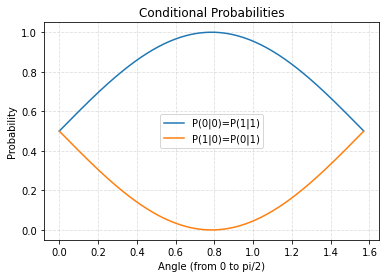

In [26]:
from matplotlib import pyplot as plt
import numpy as np
import math
%matplotlib inline

x = np.arange(0, math.pi/2, 0.01)
yMax = 1/2 + 1/2*np.sin(2*x)
yMin = 1/2 - 1/2*np.sin(2*x)

plt.plot(x,yMax,label='P(0|0)=P(1|1)')
plt.plot(x,yMin,label='P(1|0)=P(0|1)')

# Add a title
plt.title('Conditional Probabilities')

# Add X and y Label
plt.xlabel('Angle (from 0 to pi/2)')
plt.ylabel('Probability')

# Add a grid
plt.grid(alpha=.4,linestyle='--')

# Add a Legend
plt.legend()

plt.show()

So it looks the estimator function we're going to chose is:
- Result $0$ => State $0$
- Result $1$ => State $1$

The probability of success is given by:

$$P_s = \sum_{i=1}^{n} {P(H_i)P(MyResults|H_i)} =  \sum_{i=1}^{n} {P(H_i) \sum_{j \in estimator} {P(result_{j}|H_i)}}$$

where:
- $n$ is the number of hypothesis (in our case 5)
- $P(H_i)$ : probability hypothesis $H_i$ is produced (in our case all have the same likelihood)
- $P(result_{j}|H_i)$ : probability that the hypothesis $H_i$ causes the result $result_j$ where the **$j$ are chosen in the way that this probability is maximized**

So we have to compute for **every possible result** which is the hypothesis with the **highest likelihood**. We know that the hypothesis are:
- 00001 
- 00011 
- 00111 
- 01111 
- 11111 

That means that for Helstrom we have to consider all the results (32) and for of the hypothesis (5) and compute which is the hypothesis with the higher probability given that result.

Filling that table (32x5) is a lot of work so let's do an analytical analysis. For example let's suppose a result of $00010$, for finding the hypothesis with thew higher probability we have to compute the probabilities for every hypothesis and chose the higher one (remember here $P(x|y)$ means $P(result|hypothesis)$):
- $P(00010|00001) = P(0|0)P(0|0)P(0|0)P(1|0)P(0|1) = k^3(1-k)^2$ 
- $P(00010|00011) = P(0|0)P(0|0)P(0|0)P(1|1)P(0|1) = k^4(1-k)$
- $P(00010|00111) = P(0|0)P(0|0)P(0|1)P(1|1)P(0|1) = k^3(1-k)^2$
- $P(00010|01111) = P(0|0)P(0|1)P(0|1)P(1|1)P(0|1) = k^2(1-k)^3$
- $P(00010|11111) = P(0|1)P(0|1)P(0|1)P(1|1)P(0|1) = k(1-k)^4$

where we have defined:
- Probability "match" $k=P(0|0)=P(1|1)$
- Probability "no match" $1-k=P(1|0)=P(1|0)$

and checking in the graph before se wee always $k > (1-k)$ so the hypothesys with higher probability is the one that has more "matches" or what is the same where the exponent in $k$ is higher. Looking in the previous example this is "00011". Notice that in some cases several hypothesis will have the same probability and we just pick one of them.

The next code does the calculation for us using some tricks:
- For every possible result (32) and every hypothesis (5) calculate the probability of $P(result|hypothesis)$ (e.g. $P(00010|00011)$) in terms ok $k$ and $(1-k)$ performing a XOR between result and hypothesis and taking into account:
  - When resutl and hypothesis match ($P(0|0)=P(1|1)$) this is a $k$ and when not match ($P(1|0)=P(1|0)$) this is a $(1-k)$
  - Always $k > (1-k)$
- From all the possible probabilities we pick the one whith the highest value that is the same thay saying withthe highest $k$
- Finally we get a formulat for $P_s$ in term of $k$ that we can simplify (eg. with WolframAlpha).

In [27]:
import json

def num2BinaryString(num, length):
    """ Given an integer return a binary string of fixed length with leading zeros. """
    return bin(num)[2:].zfill(length)

def getAllHypotesis(n):
    """ Return a structure with all the possible hypothesis with n particles"""
    data={}
    
    for numEle1 in range(1, n+1):
        data[2**numEle1-1] = {'outputs':[], 'matches' : {}, 'prob' : 0}
        
    return data

def computeProbabilities(n, k):
    """ Return the structures of hypothesis and weights.
    
    k is just an example value to check the sum probabilities = 1
    """
    
    hypothesis = getAllHypotesis(n)
    # Key : number of matches (exponent k)
    # Value : how many probabilities have this number of matches 
    weights={}

    # the 'zeros' indicate the number of matches when using the XOR
    for output in range(2**n):
        max_zeros=None
        my_hypothesis=None
        for h,results in hypothesis.items():
            num_zeros = num2BinaryString(output^h, n).count('0')
            # Add the prob. of this output for that hypothesis. The total sum must be 1.0
            hypothesis[h]['prob'] += k**(num_zeros)*(1-k)**(n-num_zeros)    
            if max_zeros is None or num_zeros>max_zeros:
                max_zeros=num_zeros
                my_hypothesis=h

        # Add this result to the hypothesis     
        hypothesis[my_hypothesis]['outputs'].append({'output' : num2BinaryString(output, n), 'matches' : max_zeros})
        if max_zeros not in hypothesis[my_hypothesis]['matches']:
            hypothesis[my_hypothesis]['matches'][max_zeros] = 0
        hypothesis[my_hypothesis]['matches'][max_zeros] += 1

        # Add this distribution in the weights
        if max_zeros not in weights:
            weights[max_zeros] = 0
        weights[max_zeros] += 1
        
    return hypothesis, weights

def getFormulaPS(n, weights):
    """ Print the formula to calculate the PS"""
    
    str=None    
    for num_zeros, tot in weights.items():
        if str is None:
            str=""
        else:
            str+="+"
        if num_zeros==0:
            str+="%d*(1-k)^%d" % (tot, num_zeros, n-num_zeros)
        elif num_zeros==n:
            str+="%d*k^%d" % (tot, num_zeros)
        else:
            str+="%d*k^%d*(1-k)^%d" % (tot, num_zeros, n-num_zeros)
    
    return "1/%d*(%s)" % (n,str) 

def printInfoHypothesis(n, hypothesis):
    for h,data in hypothesis.items():
        print(">>> Hypothesis : %s (%f)" % (num2BinaryString(h, n), data['prob']))
        for result in data['outputs']:
            print("- %s : k^%d(1-k)^%d" % (result['output'], result['matches'], n-result['matches']))
        for num_zeros, num_outputs in data['matches'].items():
            print("+ %d*k^%d(1-k)^%d" % (num_outputs, num_zeros, (5-num_zeros)))

n=5
k=0.01

hypothesis, weights = computeProbabilities(n, k)
print ("PS (%d particles) = %s" % (n, getFormulaPS(n, weights)))
# printInfoHypothesis(n, hypothesis)

PS (5 particles) = 1/5*(14*k^4*(1-k)^1+5*k^5+11*k^3*(1-k)^2+2*k^2*(1-k)^3)


So when we have calculated we get

$$PS_{Helstrom} = \frac{1}{5}(5k^5+14k^4(1-k)^1+11k^3(1-k)^2+2k^2(1-k)^3)$$

that we can [simplify](https://www.wolframalpha.com/input/?i=1%2F5*%285*k%5E5%2B14*k%5E4*%281-k%29%5E1%2B11*k%5E3*%281-k%29%5E2%2B2*k%5E2*%281-k%29%5E3%29) as:

$$PS_{Helstrom} = \frac{1}{5}(-2k^4+5k^3+2k^2)$$

where: 

$$k =\frac{1}{2} + \frac{1}{2}sin(2\theta)$$
$$1-k = \frac{1}{2} - \frac{1}{2}sin(2\theta)$$

Now the last stage (we're getting closer!): in order to compare different strategies we have to use the same variables and remember that we expressed the probabilities in terms of $c$ where:
To compare the results with the simple measurament we have to express it in terms of $c$ that remember is 

$$c = <\Psi_0|\Psi_1>$$

So let's compute in Helstrom which is its value:

$$ 
c = 
<\Psi_0|\Psi_1> = 
<0|1> = 
\bigg(<0|cos(\theta)+<1|sin(\theta) \bigg) \bigg(cos(\theta)|0>-sin(\theta)|1> \bigg) = 
cos^{2}(\theta) - sin^{2}(\theta) = cos(2\theta)
$$

so we can rewrite $k$ as:

$$
k  = 
\frac{1}{2}+\frac{1}{2}sin(2\theta) = 
\frac{1}{2}\Big( 1+sin(2\theta)              \Big) = 
\frac{1}{2}\Big( 1+\sqrt{1-cos^{2}(2\theta)} \Big) = 
\frac{1}{2}\Big( 1+\sqrt{1-c^{2}}            \Big) 
$$

Ok, so now thaty everybody speaks the same language let's compare the $PS$ for the different srategies for the the values of $c \in [0,1]$:
- $PS_{Helstrom} = \frac{1}{5}(-2k^4+5k^3+2k^2)$
- $PS_{simple} = \frac{1-(1-c^2)^5}{5(1-c^2)}$
- $PS_{BL} = 1 - c^2 + \frac{c^2}{5}$

where:
- $c=<0|1>$
- $k=\frac{1}{2}(1+\sqrt{1-c^2})$

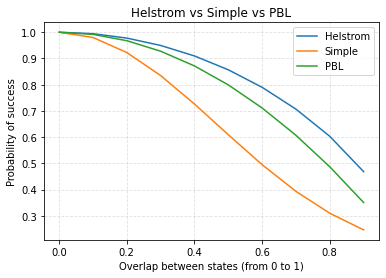

In [28]:
c = np.arange(0.001, 1.0, 0.1)
n=5
yHelstrom = (1/5)*( -2*(1/2*(1+np.sqrt(1-c**2)))**4 +
                      5*(1/2*(1+np.sqrt(1-c**2)))**3 + 
                      2*(1/2*(1+np.sqrt(1-c**2)))**2 ) 

ySimple = (1-(1-c**2)**n)/(n*(1-(1-c**2)))
yPBL = 1 - c**2 + c**2/n

plt.plot(c,yHelstrom,label='Helstrom')
plt.plot(c,ySimple,label='Simple')
plt.plot(c,yPBL,label='PBL')

# Add a title
plt.title('Helstrom vs Simple vs PBL')

# Add X and y Label
plt.xlabel('Overlap between states (from 0 to 1)')
plt.ylabel('Probability of success')

# Add a grid
plt.grid(alpha=.4,linestyle='--')

# Add a Legend
plt.legend()

plt.show()

## Online strategy : mistakes are allowed

As we have already commented, Helstrom doies not provide certainty in some cases (as it happens with basic) but we can use it in an oinline strategy and see which is the error we have.

$$
P_{err} = 
\frac{1}{2} \bigg( P(1|0) + P(0|1) \bigg) = 
\frac{1}{2} 
\bigg( 
  \big( \frac{1}{2} - \frac{1}{2}sin(2\theta) \big) +
  \big( \frac{1}{2} - \frac{1}{2}sin(2\theta) \big)
\bigg) =
\frac{1}{2}(1-sin(2\theta))
$$

that we can express in terms if $c$ taking into accoiunt the relation we have already derived:

$$c=cos(2\theta)$$

so we get

$$
P_{err} = 
\frac{1}{2}\Big( 1-\sqrt{1-c^{2}}\Big) 
$$


Let's see how the error looks with one single measurement

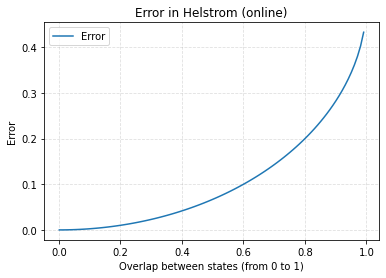

In [31]:
c = np.arange(0.001, 1.0, 0.01)
yError = (1/2)*(1-np.sqrt(1-c**2))

plt.plot(c,yError,label='Error')

# Add a title
plt.title('Error in Helstrom (online)')

# Add X and y Label
plt.xlabel('Overlap between states (from 0 to 1)')
plt.ylabel('Error')

# Add a grid
plt.grid(alpha=.4,linestyle='--')

# Add a Legend
plt.legend()

plt.show()

Where we can appreciate the expected:
- No error when $c=0$ (perpendicular states
- When $c \rightarrow 1$ the error is $1/2$

Not let's see the acummulate error when we repeat several times

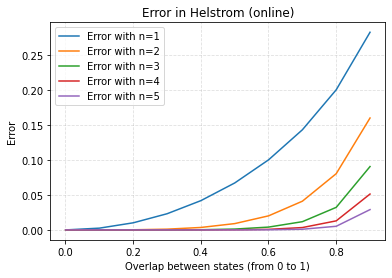

In [30]:
c = np.arange(0.001, 1.0, 0.1)

# Add a title
plt.title('Error in Helstrom (online)')

# Add X and y Label
plt.xlabel('Overlap between states (from 0 to 1)')
plt.ylabel('Error')

# Add a grid
plt.grid(alpha=.4,linestyle='--')

for n in range(1,6):
    yError = (1/2)*(1-np.sqrt(1-c**2))**n
    plt.plot(c,yError,label='Error with n=%d' % (n))

# Add a Legend
plt.legend()

plt.show()